In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C180P141NThinF_IMG_20151201_165601_cell_115.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C95P56ThinF_IMG_20150821_171603_cell_75.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C125P86ThinF_IMG_20151004_102053_cell_83.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C49P10thinF_IMG_20150724_102330_cell_160.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C49P10thinF_IMG_20150724_102843_cell_127.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C113P74ThinF_IMG_20150930_135904_cell_46.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C74P35_ThinF_IMG_20150815_114819_cell_13.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C88P49ThinF_

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

from tensorflow.keras.preprocessing.image import load_img , ImageDataGenerator, img_to_array

from keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings("ignore")

# Define Constants

In [3]:
FAST_RUN = False
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
# Initialising the CNN
model = Sequential()

In [5]:
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

In [6]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

In [7]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [8]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

In [9]:
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,961 (956.88 KB)

 Trainable params: 244,257 (954.13 KB)

 Non-trainable params: 704 (2.75 KB)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [12]:
training_set = train_datagen.flow_from_directory(
        '/kaggle/input/files1/Malaria Cells/training_set',
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=32,
        class_mode='binary')

Found 27558 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
test_set = test_datagen.flow_from_directory(
        '/kaggle/input/files1/Malaria Cells/testing_set',
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=32,
        class_mode='binary')

Found 15832 images belonging to 2 classes.


### Early Stopping

In [15]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [16]:
model.fit(training_set,
        batch_size=5000,
        epochs=10,
        validation_split=0.1,
        validation_data=test_set,
        callbacks=[early_stop]
         )

Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 550s 633ms/step - accuracy: 0.7653 - loss: 0.5198 - val_accuracy: 0.9351 - val_loss: 0.1794
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 523s 606ms/step - accuracy: 0.9374 - loss: 0.1832 - val_accuracy: 0.9480 - val_loss: 0.1489
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 544s 631ms/step - accuracy: 0.9472 - loss: 0.1671 - val_accuracy: 0.9550 - val_loss: 0.1419
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 589s 662ms/step - accuracy: 0.9456 - loss: 0.1656 - val_accuracy: 0.9552 - val_loss: 0.1301
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 604s 641ms/step - accuracy: 0.9474 - loss: 0.1575 - val_accuracy: 0.9502 - val_loss: 0.1544
Epoch 6/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 556s 634ms/step - accuracy: 0.9459 - loss: 0.1622 - val_accuracy: 0.9535 - val_loss: 0.1289
Epoch 7/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 551s 639ms/step - accuracy: 0.9503 - loss: 0.1574 - val_accuracy: 0.9564 - val_loss: 0.1278
Epoch 8/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 552s 639ms/step - accuracy: 0.9496 -

### Evaluating the Model

In [17]:
losses = pd.DataFrame(model.history.history)

<Axes: >

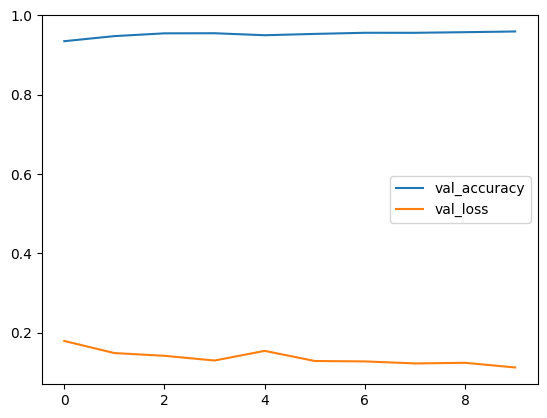

In [23]:
losses[['val_accuracy','val_loss']].plot()

<Axes: >

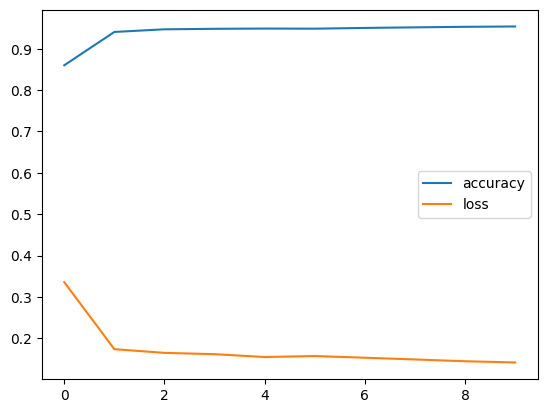

In [24]:
losses[['accuracy','loss']].plot()

<Axes: >

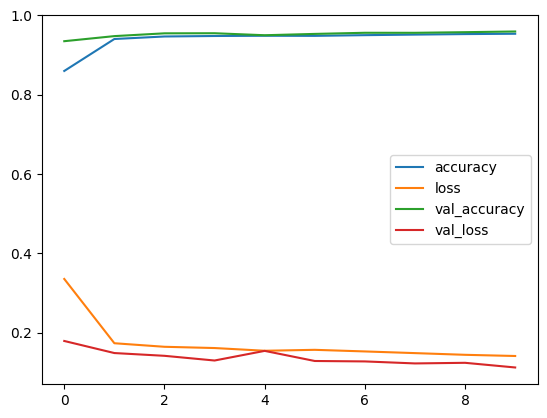

In [29]:
losses[['accuracy','loss','val_accuracy','val_loss']].plot()

In [19]:
model.metrics_names

['loss', 'compile_metrics']

In [20]:
model.evaluate(test_set)

495/495 ━━━━━━━━━━━━━━━━━━━━ 57s 115ms/step - accuracy: 0.9597 - loss: 0.1137


[0.11254003643989563, 0.9596387147903442]

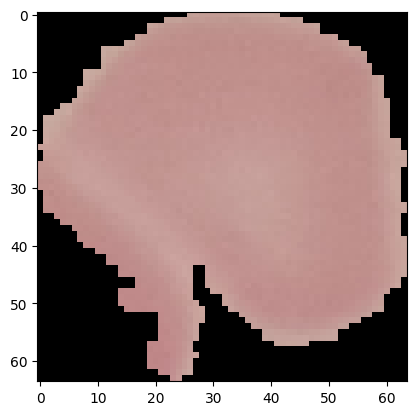

In [42]:
test_image = load_img('/kaggle/input/files1/Malaria Cells/single_prediction/Uninfected.png', target_size = (IMAGE_WIDTH, IMAGE_HEIGHT))
plt.imshow(test_image)

In [43]:
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Uninfected'
else:
    prediction = 'Parasitised'
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


'Uninfected'

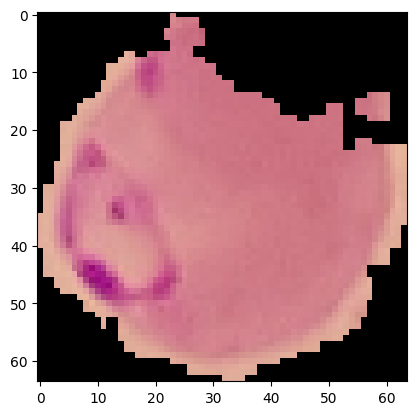

In [44]:
test_image = load_img('/kaggle/input/files1/Malaria Cells/single_prediction/Parasitised.png', target_size = (IMAGE_WIDTH, IMAGE_HEIGHT))
plt.imshow(test_image)

In [45]:
test_image = load_img('/kaggle/input/files1/Malaria Cells/single_prediction/Parasitised.png', target_size = (IMAGE_WIDTH, IMAGE_HEIGHT))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Uninfected'
else:
    prediction = 'Parasitised'
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


'Parasitised'

# Save Model

In [46]:
model.save("model.h5")